In [35]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [36]:

iris=load_iris()
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)
data['target']=iris.target

In [37]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [39]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
df = data[data['target'] != 0][['sepal width (cm)','petal length (cm)','target']]

In [41]:
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


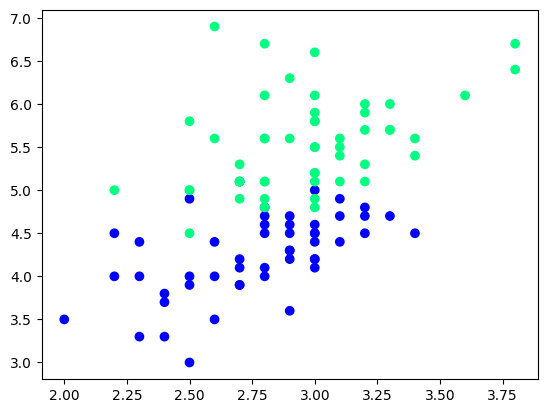

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['target'],cmap='winter')

In [43]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal width (cm),petal length (cm),target
94,2.7,4.2,1
72,2.5,4.9,1
95,3.0,4.2,1
87,2.3,4.4,1
56,3.3,4.7,1
93,2.3,3.3,1
84,3.0,4.5,1
68,2.2,4.5,1
107,2.9,6.3,2
55,2.8,4.5,1


In [44]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [45]:
df_train

,sepal width (cm),petal length (cm),target
51,3.2,4.5,1
90,2.6,4.4,1
58,2.9,4.6,1
92,2.6,4.0,1
142,2.7,5.1,2
102,3.0,5.9,2
143,3.2,5.9,2
107,2.9,6.3,2
149,3.0,5.1,2
110,3.2,5.1,2


In [46]:
df_val

,sepal width (cm),petal length (cm),target
79,2.6,3.5,1
64,2.9,3.6,1
83,2.7,5.1,1
140,3.1,5.6,2
82,2.7,3.9,1


In [47]:
df_test

,sepal width (cm),petal length (cm),target
128,2.8,5.6,2
104,3.0,5.8,2
75,3.0,4.4,1
91,3.0,4.6,1
116,3.0,5.5,2


In [48]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values
y_test

array([1, 1, 1, 2, 1], dtype=int64)

Case 1 Bagging

In [49]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),target
110,3.2,5.1,2
90,2.6,4.4,1
143,3.2,5.9,2
149,3.0,5.1,2
149,3.0,5.1,2
107,2.9,6.3,2
92,2.6,4.0,1
51,3.2,4.5,1


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

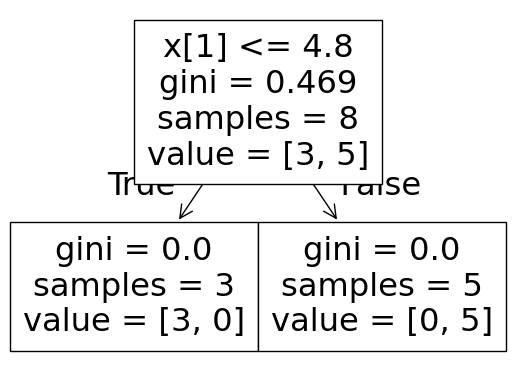

0.8


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [53]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [54]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
149,3.0,5.1,2
143,3.2,5.9,2
149,3.0,5.1,2
51,3.2,4.5,1
102,3.0,5.9,2
92,2.6,4.0,1
90,2.6,4.4,1
149,3.0,5.1,2


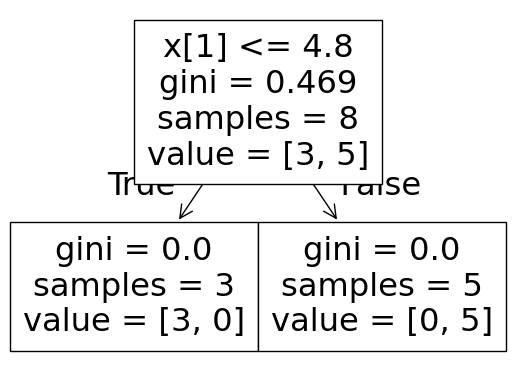

0.8


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [55]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [56]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
92,2.6,4.0,1
51,3.2,4.5,1
51,3.2,4.5,1
149,3.0,5.1,2
149,3.0,5.1,2
143,3.2,5.9,2
102,3.0,5.9,2
110,3.2,5.1,2


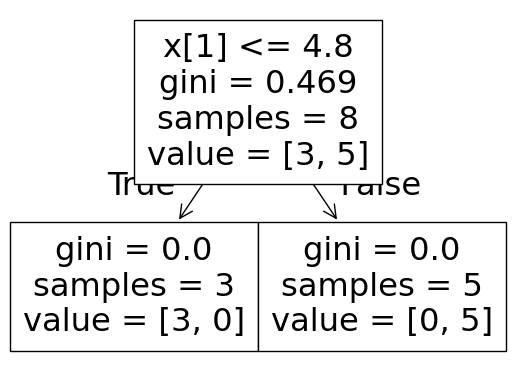

0.8


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [58]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

Predict

In [59]:
df_test

,sepal width (cm),petal length (cm),target
128,2.8,5.6,2
104,3.0,5.8,2
75,3.0,4.4,1
91,3.0,4.6,1
116,3.0,5.5,2


In [60]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Pasting

In [61]:
df_train

,sepal width (cm),petal length (cm),target
51,3.2,4.5,1
90,2.6,4.4,1
58,2.9,4.6,1
92,2.6,4.0,1
142,2.7,5.1,2
102,3.0,5.9,2
143,3.2,5.9,2
107,2.9,6.3,2
149,3.0,5.1,2
110,3.2,5.1,2


In [62]:
df_train.sample(8)

,sepal width (cm),petal length (cm),target
143,3.2,5.9,2
102,3.0,5.9,2
110,3.2,5.1,2
51,3.2,4.5,1
58,2.9,4.6,1
90,2.6,4.4,1
107,2.9,6.3,2
149,3.0,5.1,2
